In [1]:
#!pip install scikit-image

In [17]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import accuracy_score
from sklearn import svm
import pandas as pd

In [3]:
IMAGE_SIZE = (100, 100) 

In [4]:
def load_data(directory):
    images = []
    labels = []
    
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return None
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            
            try:
                img = imread(img_path)
                img_resized = resize(img, IMAGE_SIZE, anti_aliasing=True)
                images.append(img_resized.flatten())
                
                label = filename.split('.')[0]
                if label == 'cat':
                    labels.append(0)
                elif label == 'dog':
                    labels.append(1)
                else:
                    print(f"Unexpected label in file: {filename}")
            
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    
    if not images or not labels:
        print(f"No images found in {directory}")
        return None

    return np.array(images), np.array(labels)

In [5]:
# train_dir = './addd'
# X_train, y_train = load_data(train_dir)

In [6]:
train_dir = './train'
X_train, y_train = load_data(train_dir)

In [7]:
num_images_to_show = 4

Loaded 2002 images with 2002 labels


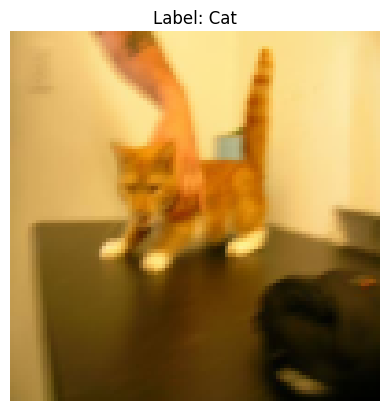

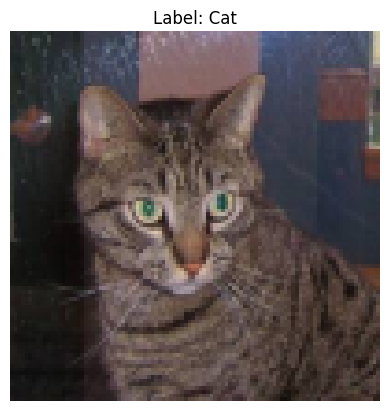

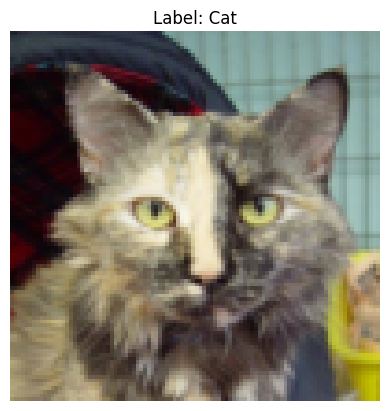

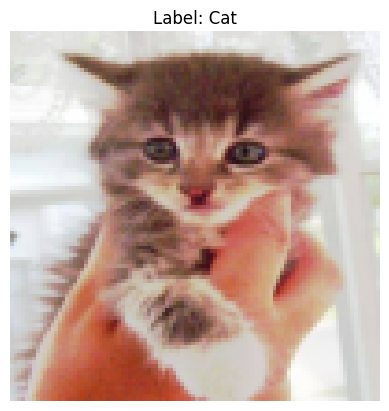

In [8]:
if X_train is not None and y_train is not None:
    print(f"Loaded {len(X_train)} images with {len(y_train)} labels")
    
    for i in range(num_images_to_show):
        img = X_train[i].reshape(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
        label = 'Cat' if y_train[i] == 0 else 'Dog'
        
        plt.imshow(img)
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.show()
else:
    print("Data loading failed.")

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [14]:
y_pred = clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

Validation accuracy: 53.87%


In [12]:
model_filename = 'cat_dog_svm_model.pkl'
joblib.dump(clf, model_filename)
print(f"Model saved as {model_filename}")

Model saved as cat_dog_svm_model.pkl


In [ ]:
# clf = joblib.load('cat_dog_svm_model.pkl')

In [15]:
def load_test_data(directory):
    images = []
    ids = []
    
    if not os.path.exists(directory):
        print(f"Directory {directory} does not exist.")
        return None, None
    
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            img_path = os.path.join(directory, filename)
            
            try:
                img = imread(img_path)
                img_resized = resize(img, IMAGE_SIZE, anti_aliasing=True)
                images.append(img_resized.flatten())
                
                image_id = int(filename.split('.')[0])
                ids.append(image_id)
            
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    
    if not images or not ids:
        print(f"No images found in {directory}")
        return None, None

    return np.array(images), ids

In [16]:
test_dir = './test'
X_test, test_ids = load_test_data(test_dir)

In [18]:
if X_test is not None and test_ids is not None:
    y_test_pred = clf.predict(X_test)
    
    submission_df = pd.DataFrame({'id': test_ids, 'label': y_test_pred})
    
    submission_df = submission_df.sort_values(by='id').reset_index(drop=True)
    
    submission_filename = 'submission.csv'
    submission_df.to_csv(submission_filename, index=False)
    print(f"Submission file saved as {submission_filename}")

    print(submission_df.head())
else:
    print("Test data loading failed.")

Submission file saved as submission.csv
   id  label
0   1      0
1   2      1
2   3      1
3   4      1
4   5      0
